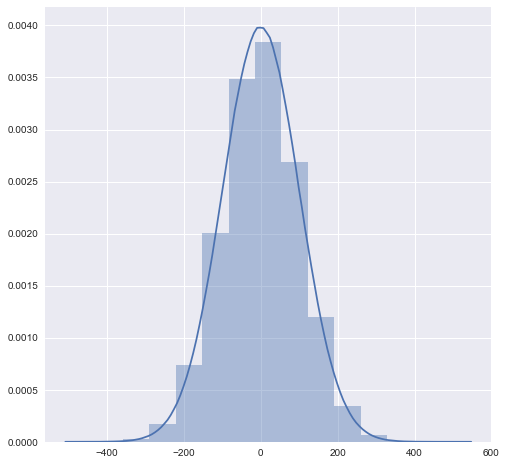

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
% matplotlib inline
mpl.rcParams['figure.figsize'] = (8, 8)

# Create data
N = 10000000
m = 3.0
b = 12.0
x = np.random.uniform(0, 1000, N)
x = np.sort(x)
noise = np.random.normal(0, 100, N)
sns.distplot(noise, bins = 15, kde = True)
plt.show()

y = m*x + b + noise

# Plot 
#plt.scatter(x, y, alpha = 0.3)
#plt.title('Scatter plot')
#plt.xlabel('x')
#plt.ylabel('y')
#ax = plt.gca()
#ax.set_aspect('equal')

#guess_a = 3
#guess_b = 12

#guessed_y = guess_a * x + guess_b
#plt.scatter(x, guessed_y, alpha = 0.5, marker = ".")
#plt.show()

#def cost_function(actual_y, model_y):
#    return np.sum((actual_y - model_y) ** 2)/actual_y.shape[0] 

#print cost_function(y, guessed_y)    

In [491]:
# use a stupid brute force exhaustive search algorithm to find the best a and b
possible_as = np.arange(-10700, -10600, 1)
possible_bs = np.arange(-128600, -128500, 1)
print possible_as, possible_bs



[-10700 -10699 -10698 -10697 -10696 -10695 -10694 -10693 -10692 -10691
 -10690 -10689 -10688 -10687 -10686 -10685 -10684 -10683 -10682 -10681
 -10680 -10679 -10678 -10677 -10676 -10675 -10674 -10673 -10672 -10671
 -10670 -10669 -10668 -10667 -10666 -10665 -10664 -10663 -10662 -10661
 -10660 -10659 -10658 -10657 -10656 -10655 -10654 -10653 -10652 -10651
 -10650 -10649 -10648 -10647 -10646 -10645 -10644 -10643 -10642 -10641
 -10640 -10639 -10638 -10637 -10636 -10635 -10634 -10633 -10632 -10631
 -10630 -10629 -10628 -10627 -10626 -10625 -10624 -10623 -10622 -10621
 -10620 -10619 -10618 -10617 -10616 -10615 -10614 -10613 -10612 -10611
 -10610 -10609 -10608 -10607 -10606 -10605 -10604 -10603 -10602 -10601] [-128600 -128599 -128598 -128597 -128596 -128595 -128594 -128593 -128592
 -128591 -128590 -128589 -128588 -128587 -128586 -128585 -128584 -128583
 -128582 -128581 -128580 -128579 -128578 -128577 -128576 -128575 -128574
 -128573 -128572 -128571 -128570 -128569 -128568 -128567 -128566 -1285

In [492]:
lowest_thiscost = float('inf')

for a_can in possible_as:
    for b_can in possible_bs:
        guessed_y = a_can * x + b_can
        this_cost = cost_function(y, guessed_y)
        if this_cost < lowest_thiscost:
            lowest_thiscost = this_cost
            best_a = a_can 
            best_b = b_can
            
print lowest_thiscost, best_a, best_b

36699790956.1 -10601 -128561


[-15.    -14.999 -14.998 ...,  17.997  17.998  17.999]


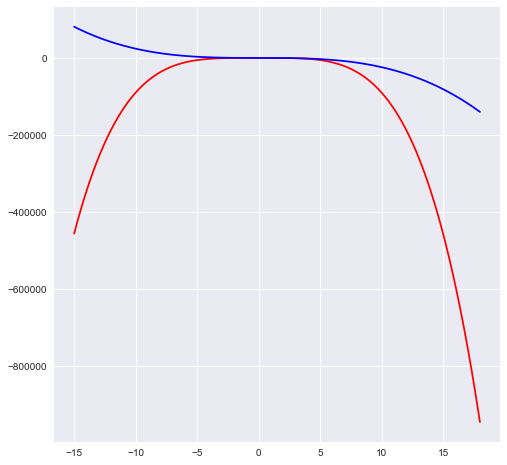

In [322]:
# lets plot a function curve

x = np.arange (-15, 18, 0.001)
print x

y = 3*x*4 - 9*x**4 + 5
dy = 12*x**3 - 36*x**3
plt.plot(x, y, color = "r")
plt.plot(x, dy, color = "b")

plt.show()

In [327]:
%time

import random

stopping_criteria = 0.00000000000000000000001
learning_rate = 0.00001
max_interations = 350
rx = random.random()*10

def dyhi(x):
    return 12*x**3 - 36*x**3

for i in xrange(max_interations):
    old_rx = rx
    rx += learning_rate*dyhi(rx)
    if abs(rx - old_rx) < stopping_criteria:
        break
        
print rx

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 7.15 µs
0.874728813057


70


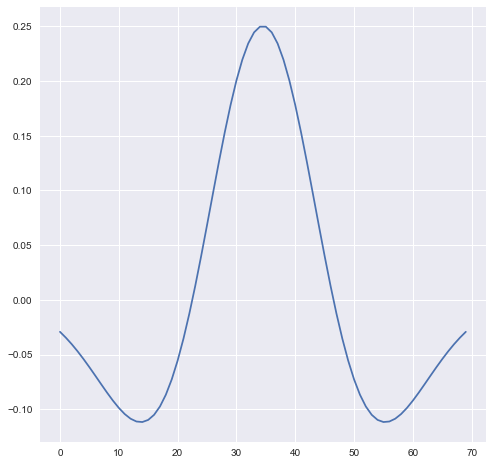

In [324]:
from scipy import signal
import matplotlib.pyplot as plt

points = 70

a = 12.0
vec2 = signal.ricker(points, a)
print(len(vec2))
plt.plot(vec2)
plt.show()

In [3]:
%%time

scaling_factor = max(np.max(x), np.max(y))/10.0
x_scaled = x/scaling_factor
y_scaled = y/scaling_factor


def partial_derivative_b(a, b, x, y):
    return 2*a*x + 2*b - 2*y

def partial_derivative_a(a, b, x, y):
    return (2*a*x + 2*b - 2*y)*x

stopping_criteria = 1e-10
learning_rate = 0.00001
epochs = 5
num_points = len(x)
a = 0
b = 0
xy_arr = np.array([x_scaled, y_scaled]).T

for epoch in range(epochs):
    np.random.shuffle(xy_arr)    
    shuffled_x = xy_arr[:,0]
    shuffled_y = xy_arr[:,1]
    old_batch_a = a
    old_batch_b = b
    
    for i in xrange(num_points):
        old_a = a
        old_b = b        
        this_point_x = shuffled_x[i]
        this_point_y = shuffled_y[i
                                 ]
        a += -learning_rate*partial_derivative_a(old_a, old_b, this_point_x, this_point_y)
        b += -learning_rate*partial_derivative_b(old_a, old_b, this_point_x, this_point_y)
                        
    if abs(old_a - a) < stopping_criteria and abs(old_b - b) < stopping_criteria:
        break

    print 'training epoch ' + str(epoch + 1)
    print "a = ", a
    print "b = ", b * scaling_factor
    

training epoch 1
a =  2.99935056801
b =  11.6879631342


KeyboardInterrupt: 